In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import os
import re
import seaborn as sns
import scipy.stats as ss
import random

In [80]:
pit_stops=pd.read_csv(r'./pit_stops.csv')
races=pd.read_csv(r'./races.csv')
drivers=pd.read_csv(r'./drivers.csv')

In [81]:
pit_stops.drop(['time', 'duration'], axis=1, inplace=True)
#quitar hora de parada y tiempo en segundos

In [82]:
# cambiar tipo de campo milisegundpos a entero
pit_stops["milliseconds"].astype(int)

0       26898
1       25021
2       23426
3       23251
4       23842
        ...  
9891    22054
9892    22731
9893    21537
9894    22062
9895    22357
Name: milliseconds, Length: 9896, dtype: int32

In [83]:
print('Primera carrera registrada en csv pit_stops: Nº {}, {} {}'.format(pit_stops['raceId'].min(), races.loc[839, 'name'], races.loc[races[races.raceId==841].index[0], 'year']))
print('Última carrera registrada en csv pit_stops: {}, {} {}'.format(pit_stops['raceId'].max(), races.loc[1085, 'name'], races.loc[races[races.raceId==1105].index[0], 'year']))

Primera carrera registrada en csv pit_stops: Nº 841, Australian Grand Prix 2011
Última carrera registrada en csv pit_stops: 1105, Spanish Grand Prix 2023


In [84]:
# rango de los indices de las carreras válidas  == 839 a 1085, para las carreras 841 a 1105

races[(races.raceId>=841) & (races.raceId<=1105)].index

Index([ 839,  840,  841,  842,  843,  844,  845,  846,  847,  848,
       ...
       1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085],
      dtype='int64', length=247)

In [85]:
# a partir del índice de races, creo un diccionario con raceId y nombre (para generar gráficos personalizados)

dictraces={}
nombre_carreras=races[['raceId','name','year']]
for i in races[(races.raceId>=841) & (races.raceId<=1105)].index:
    dictraces[nombre_carreras.loc[i,'raceId']]={'año':nombre_carreras.loc[i, 'year'], 'nombre':nombre_carreras.loc[i, 'name'] }


# ejemplos de  acceso
print(dictraces[841]['año'])
print(dictraces[841]['nombre'])
print(dictraces[1105])

2011
Australian Grand Prix
{'año': 2023, 'nombre': 'Spanish Grand Prix'}


In [86]:
# a partir de drivers creo un diccionario con driverId (identificador de conductor y driverRef (alias) para añadir a pit_stops

dictDrivers={}

for i in drivers.index:
    dictDrivers[drivers.loc[i,'driverId']]=drivers.loc[i,'driverRef']
    
# ejemplo de acceso

print(dictDrivers[1])
print(dictDrivers[4])

hamilton
alonso


In [87]:
# añadimos columna con alias de conductor al lado de su Id
 
pit_stops.insert(loc = 2,
          column = 'driver',
          value = pit_stops['driverId'].map(dictDrivers))

In [88]:
pit_stops

,raceId,driverId,driver,stop,lap,milliseconds
0,841,153,alguersuari,1,1,26898
1,841,30,michael_schumacher,1,1,25021
2,841,17,webber,1,11,23426
3,841,4,alonso,1,12,23251
4,841,13,massa,1,13,23842
...,...,...,...,...,...,...
9891,1105,847,russell,2,45,22054
9892,1105,1,hamilton,2,50,22731
9893,1105,815,perez,2,50,21537
9894,1105,846,norris,3,50,22062


* <span style="color:YELLOW">ESTUDIO DE TIEMPOS DE PIT-STOP</span>
> <font size="0.3"> LOS TIEMPOS DEL DATASET SON <span style="color:RED">***PITSTOP IN - PITSTOP OUT***</span>  
>>NO SÓLO EL TIEMPO DE TRABAJO DE MECÁNICOS</font>

In [89]:
# pit_stops[(pit_stops.raceId==1105) & ((pit_stops.driverId==4)|(pit_stops.driverId==1))]

#elegir conductores y carrera concreta

In [90]:
# pit_stops.loc[9853:9855]

#elegir por indice concreto

In [91]:
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme, element_text

### <span style="color:YELLOW">ESTUDIO DE TIEMPOS DE PIT-STOP</span>
> <font size="0.3"> LOS TIEMPOS DEL DATASET SON <span style="color:RED">***PITSTOP IN - PITSTOP OUT***</span>  
>>NO SÓLO EL TIEMPO DE TRABAJO DE MECÁNICOS</font>

### Como afecta la bandera roja  
<img src="banderaroja.jpg"  width="200" style="border:5px double white;">

https://www.dazn.com/es-ES/news/f%C3%B3rmula-1/que-significa-bandera-roja-formula-1/vp8qy830860r1wd1qiwpp6k14


En la F1 suele ser habitual esta bandera por un accidente o causas metereológicas.  
Su significado agitada es el siguiente: detención de los entrenamientos o de la carrera.  

Estas son sus particularidades:

- Todos los pilotos deben reducir inmediatamente su velocidad, detenerse si es necesario y <span style="color:RED">volver a los boxes</span>
- Está prohibido adelantar.
- Esta bandera se muestra únicamente por orden del director de carrera.
- Todos los semáforos del trazado se pondrán en rojo.
- Se podrá sacar bandera roja en cualquier momento sin importar la vuelta.  

* Esto afecta directamente a la comparación de tiempos si se comparan con el resto de carreras*

#### En este grafico vemos que los tiempos en general de todas las carreras estudiadas, se concentran enla mitad del primer cuadro.  
 + unos 75000ms

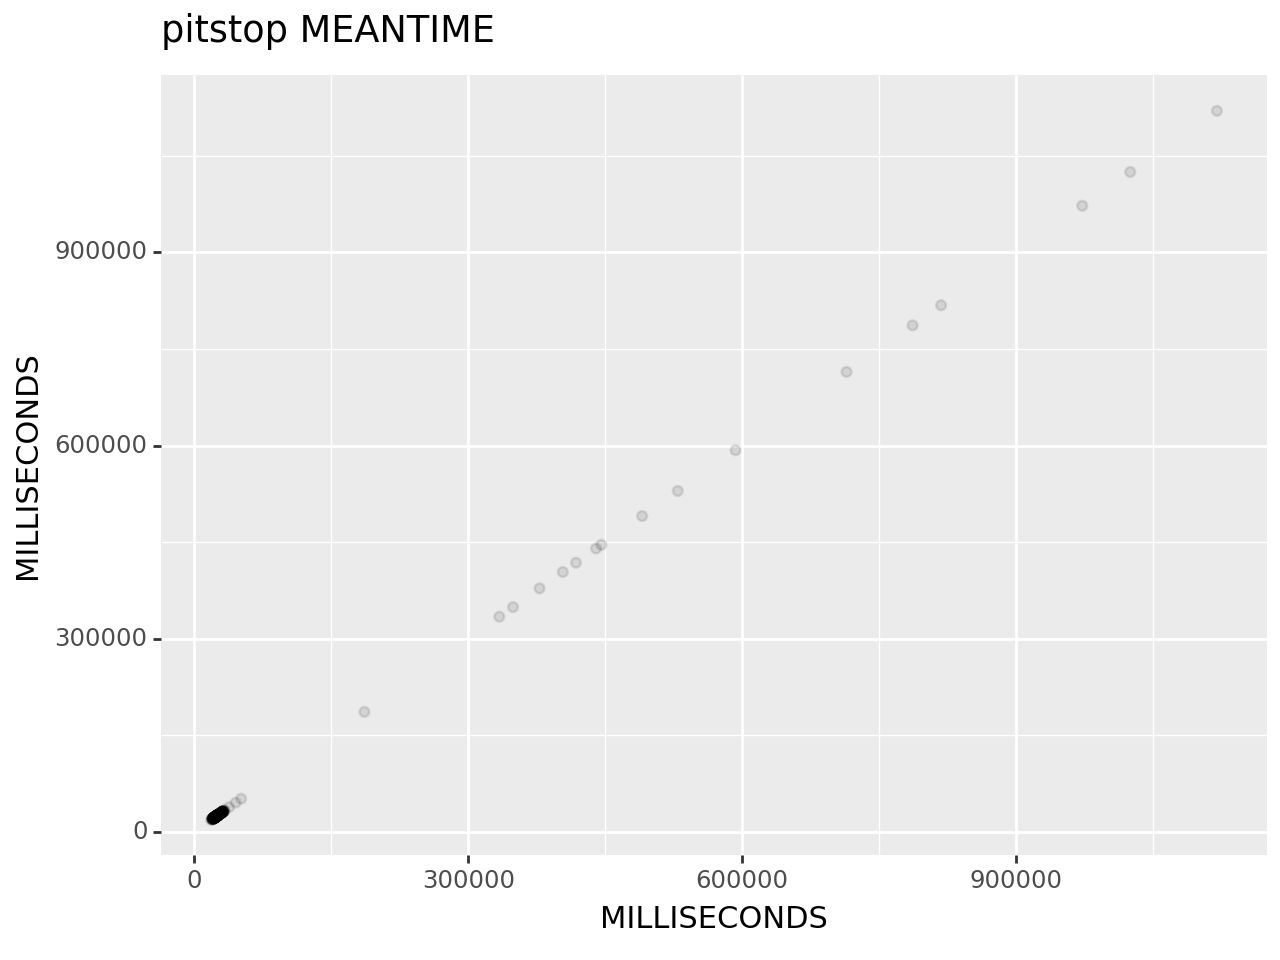

<Figure Size: (640 x 480)>

In [92]:
(
    ggplot(pit_stops[['raceId','milliseconds']].groupby('raceId').agg('mean'), aes(x='milliseconds', y='milliseconds'))
    + geom_point(alpha=0.1)
    + labs(
        x='MILLISECONDS' 
        ,y='MILLISECONDS'
        , title="pitstop MEANTIME")
    
)

In [93]:
Si 

NameError: name 'Si' is not defined

+ Contamos por carrera paradas en boxes superiores a 75000ms

In [ ]:
pit_stops[pit_stops.milliseconds>75000].groupby('raceId').count().sort_values('driverId')

,driverId,driver,stop,lap,milliseconds
raceId,,,,,
853,1,1,1,1,1
1044,1,1,1,1,1
962,1,1,1,1,1
961,1,1,1,1,1
957,1,1,1,1,1
953,1,1,1,1,1
975,1,1,1,1,1
903,1,1,1,1,1
901,1,1,1,1,1


+ revisamos como ejemplo la última raceId=1100 con 47 paradas en boxes de más de 75000ms entre todos los pilotos

In [ ]:
races['url'][races.raceId==1100]

1081    https://en.wikipedia.org/wiki/2023_Australian_...
Name: url, dtype: object

In [ ]:
* Wikipedia nos informa que esta carrera tuvo hasa tres banderas rojas

https://es.wikipedia.org/wiki/Anexo:Gran_Premio_de_Australia_de_2023

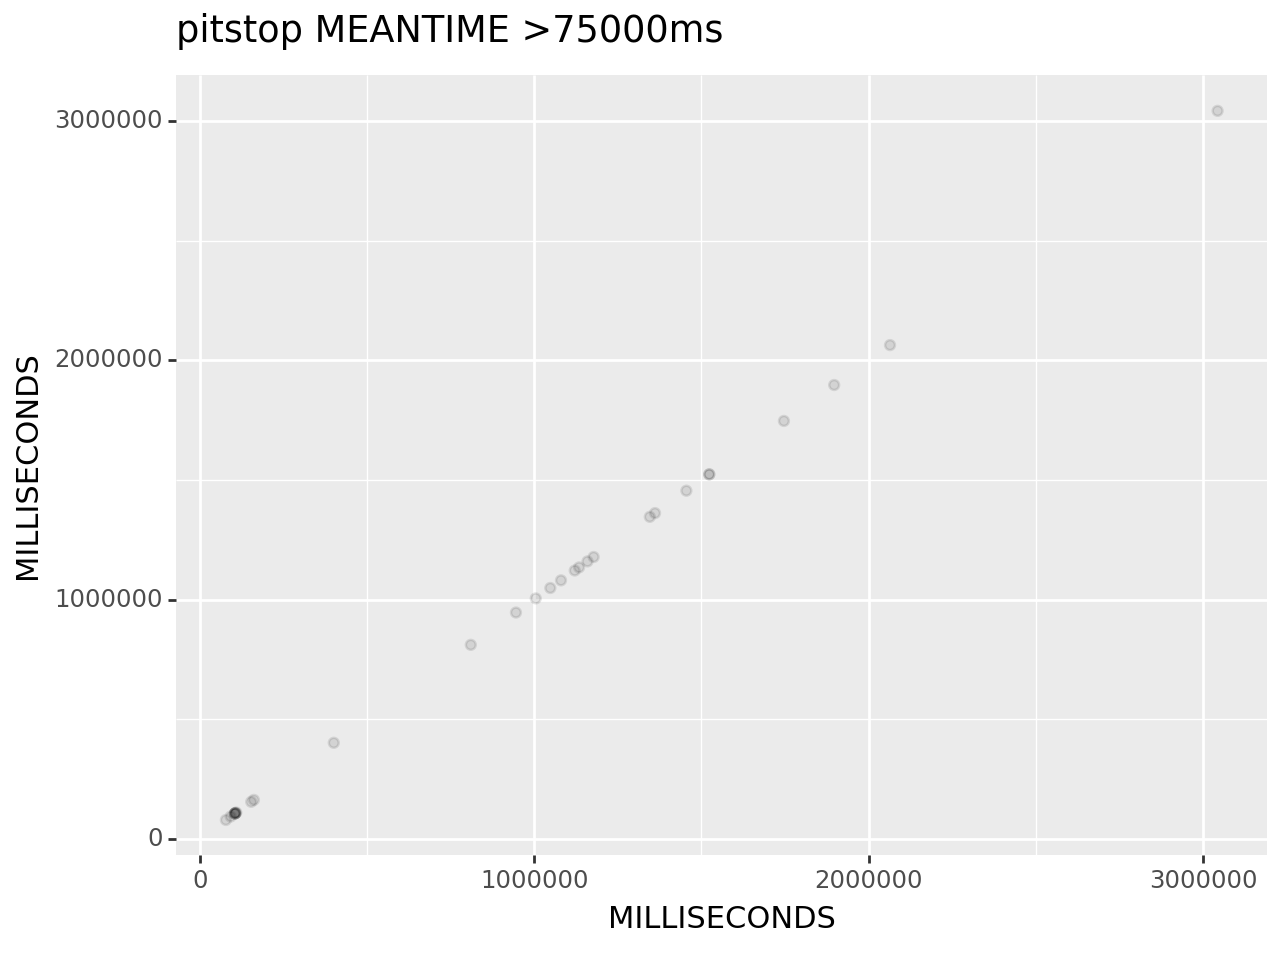

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(pit_stops[['raceId','milliseconds']][pit_stops.milliseconds>75000].groupby('raceId').agg('mean'), aes(x='milliseconds', y='milliseconds'))
    + geom_point(alpha=0.1)
    + labs(
        x='MILLISECONDS' 
        ,y='MILLISECONDS'
        , title="pitstop MEANTIME >75000ms")
    
)

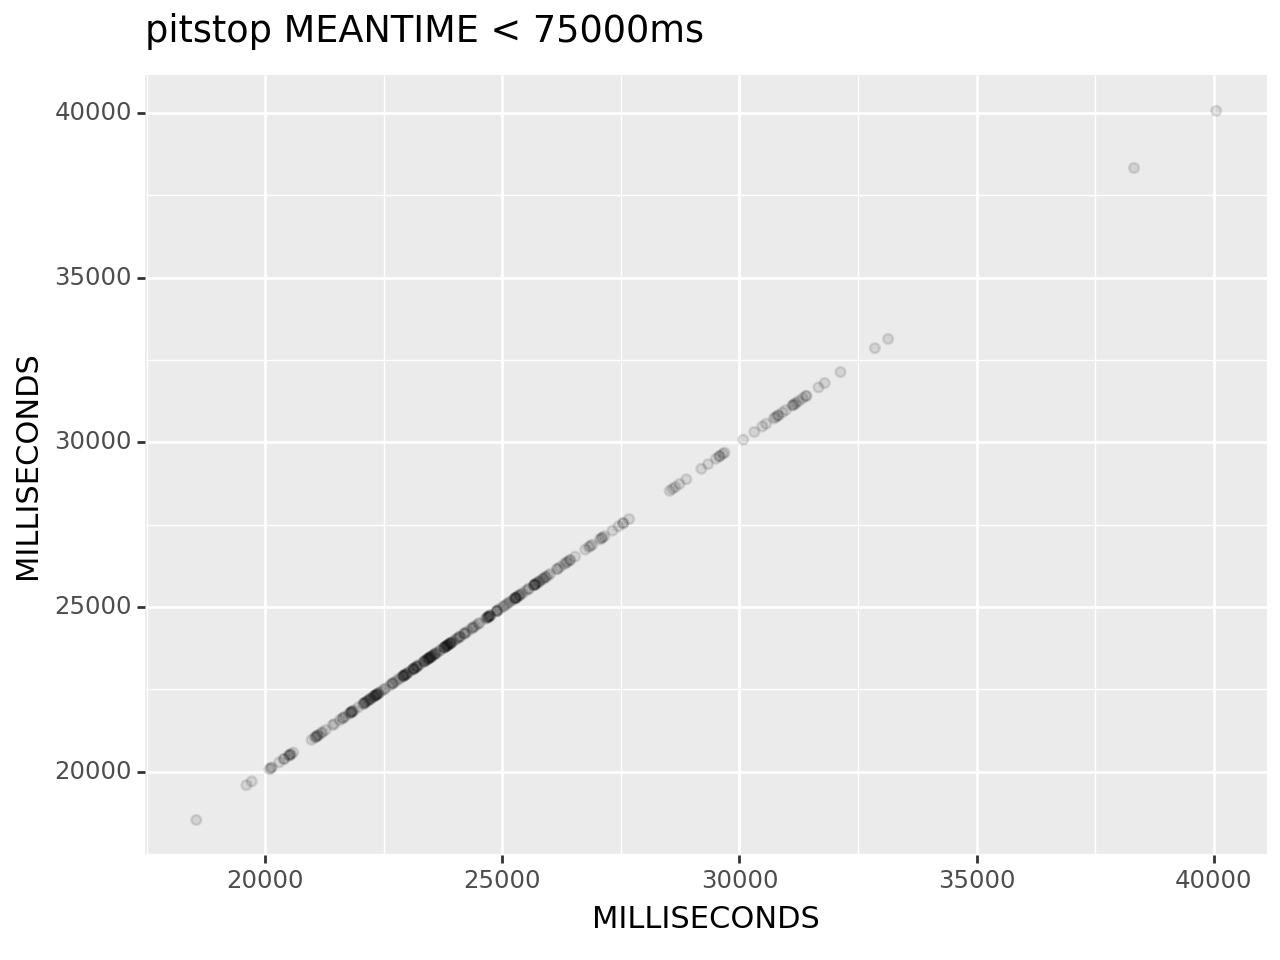

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(pit_stops[['raceId','milliseconds']][pit_stops.milliseconds<75000].groupby('raceId').agg('mean'), aes(x='milliseconds', y='milliseconds'))
    + geom_point(alpha=0.1)
    + labs(
        x='MILLISECONDS' 
        ,y='MILLISECONDS'
        , title="pitstop MEANTIME < 75000ms")
    
)

In [ ]:
# (
#        # ggplot(pit_stops[(pit_stops.raceId==1105) & ((pit_stops.driverId==4)|(pit_stops.driverId==1))])
#        # ggplot(pit_stops.loc[9853:9856][pit_stops.raceId==1105])
#        ggplot(pit_stops)
       
#     + facet_grid(facets="raceId~milliseconds")
#     + aes(x="raceId", y="milliseconds")
#     + labs(
#         x="DRIVER",
#         y="pitstop TIME",
#         title="pitstop TIME RACE 1105 by DRIVER"
#     )
#     + theme(axis_text_x = element_text(angle = 90, vjust = 0.5, hjust=1))
#     #+ theme(axis_text_x=element_text(angle = 90, hjust = 1))
#     + theme(figure_size=(10,10))
#     #+ theme(axis_text_x=element_text(rotation=90, hjust=1))
#     + geom_point(alpha=0.3)
    
)

KeyboardInterrupt: 

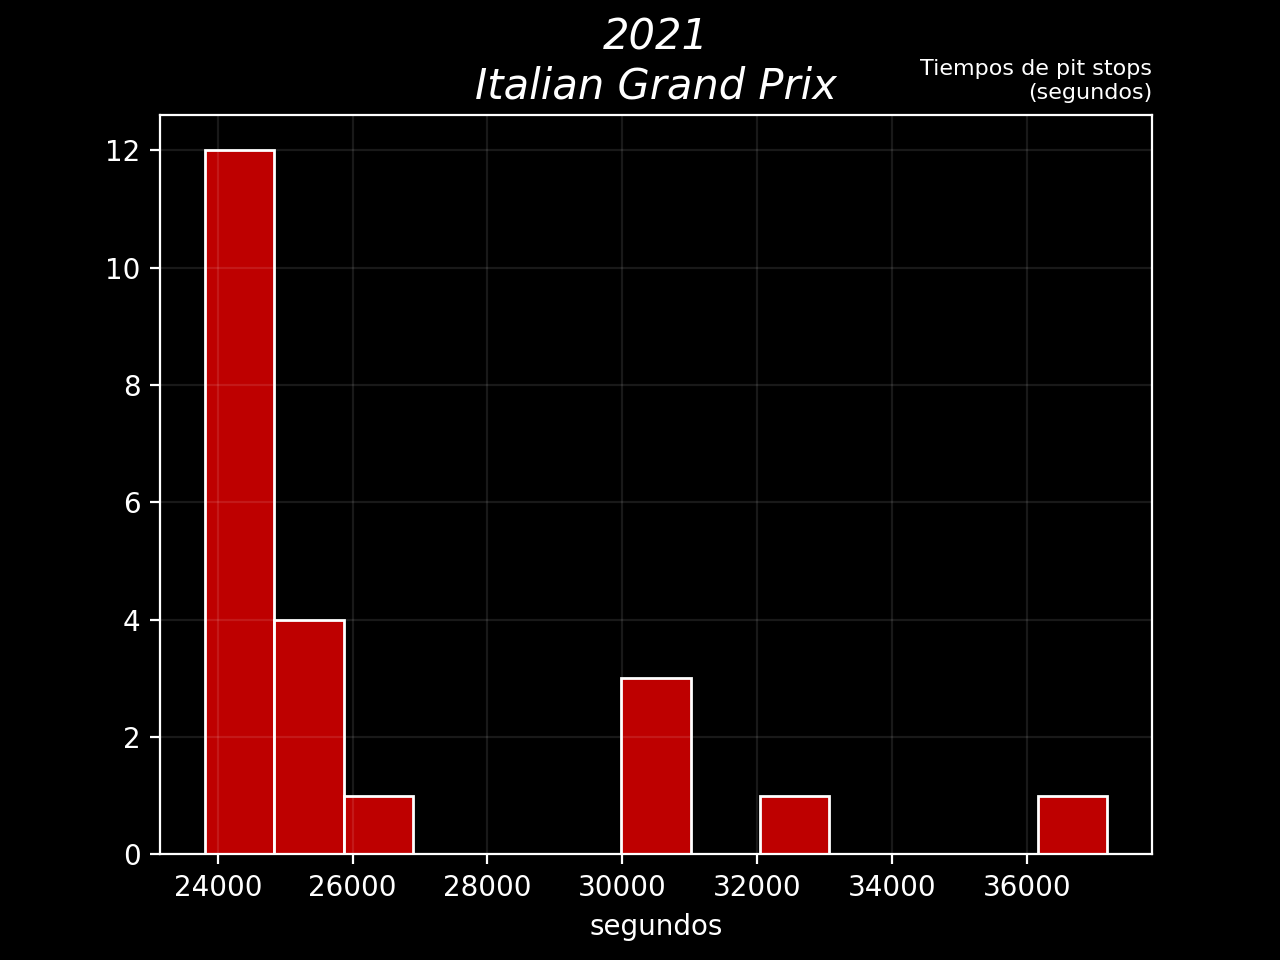

In [ ]:
# ejemplos de distribución de los segundos de cada pit stop por carrera
carrera=random.randint(841,1105)

plt.xlabel('segundos')
plt.ylabel(' ')

plt.style.use('dark_background')

plt.grid(alpha=0.1)

plt.title(f"{dictraces[carrera]['año']}\n{dictraces[carrera]['nombre']}", loc='center', style='oblique', ha='center', fontsize=15)
plt.title("Tiempos de pit stops\n(segundos)", fontsize=8, loc='right')

sns.histplot(pit_stops[pit_stops.raceId==carrera]["milliseconds"], color='red');

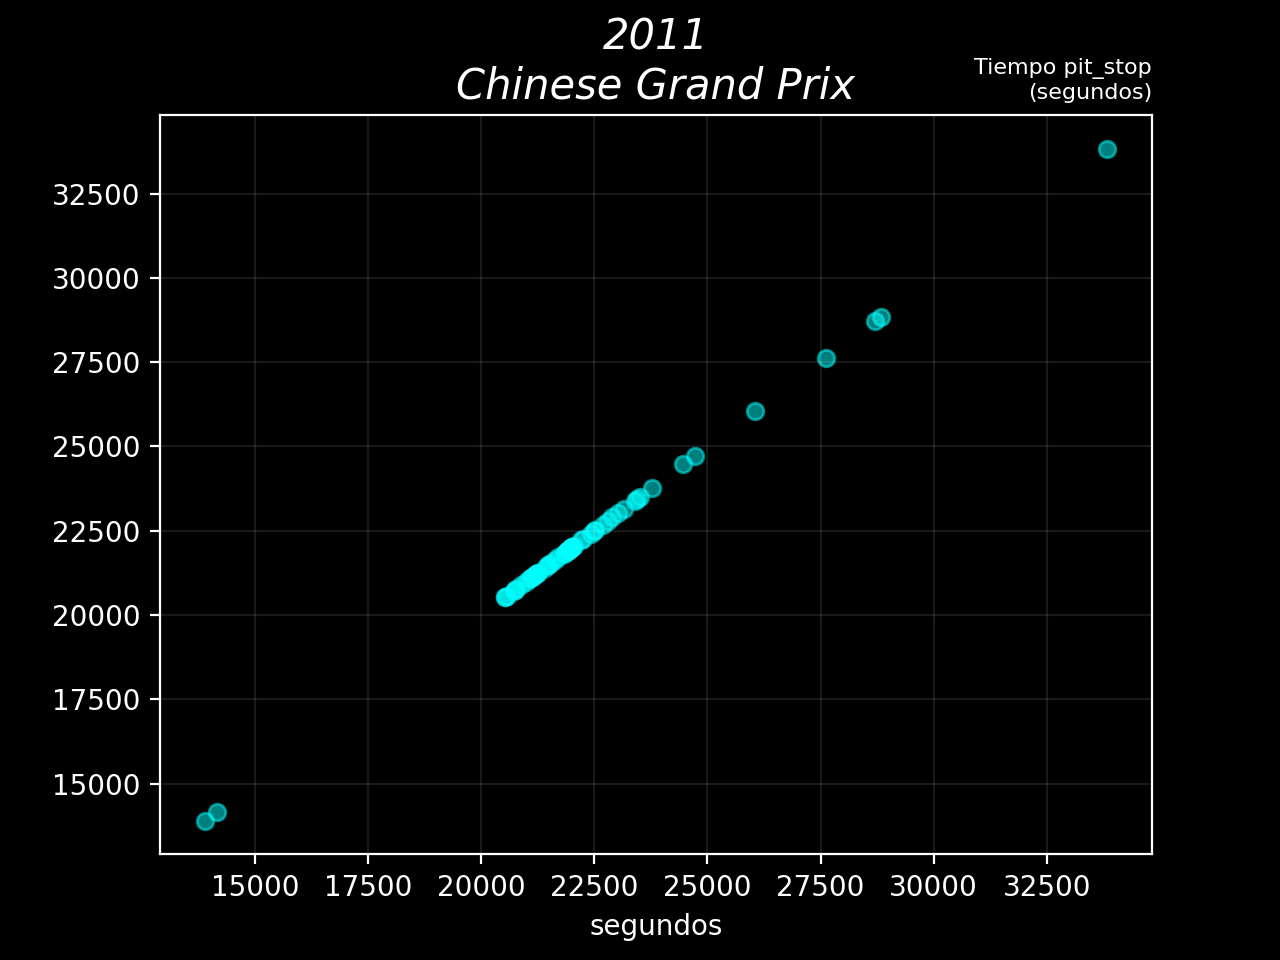

In [ ]:
carrera=random.randint(841,1005)
#plt.title(f'Carrera Nº {carrera},\nTiempos de pit stops (en segundos)')
plt.grid(alpha=0.1)
plt.xlabel('segundos')
plt.ylabel(' ')
plt.title(f"{dictraces[carrera]['año']}\n{dictraces[carrera]['nombre']}", loc='center', style='oblique', ha='center', fontsize=15)
plt.title(f'Tiempo pit_stop\n(segundos)', loc='right', fontsize=8)
plt.scatter(pit_stops[pit_stops.raceId==carrera]["milliseconds"], pit_stops[pit_stops.raceId==carrera]["milliseconds"], c='aqua', alpha=0.5)

In [ ]:
# diccionario con tiempos máximos y minimos de pit_stop por carrera
dict_max_min={}
for i in range(841,1006):
    dict_max_min[i]=(pit_stops[pit_stops.raceId==i]['milliseconds'].min(), pit_stops[pit_stops.raceId==i]['milliseconds'].max())

In [ ]:
print(min(dict_max_min.values()))
print(max(dict_max_min.values()))

(12897, 43574)
(29736, 35112)


In [ ]:
minimo=[]
maximo=[]
for j in dict_max_min.values():
    minimo.append(j[0])
    maximo.append(j[1])

In [ ]:
print(f"Menor tiempo absoluto de pitstop: {min(minimo)}")
#print(f"Mayor tiempo menor de pitstop: {max(minimo)}")

#print(f"Menor tiempo mayor de pitstop: {min(maximo)}")
print(f"Mayor tiempo absoluto de pitstop: {max(maximo)}")

Menor tiempo absoluto de pitstop: 12897
Mayor tiempo absoluto de pitstop: 2011266


In [ ]:
#sns.set (rc = {"figure.figsize" :( 20 , 4 )}) # ancho = 20, # alto = 4

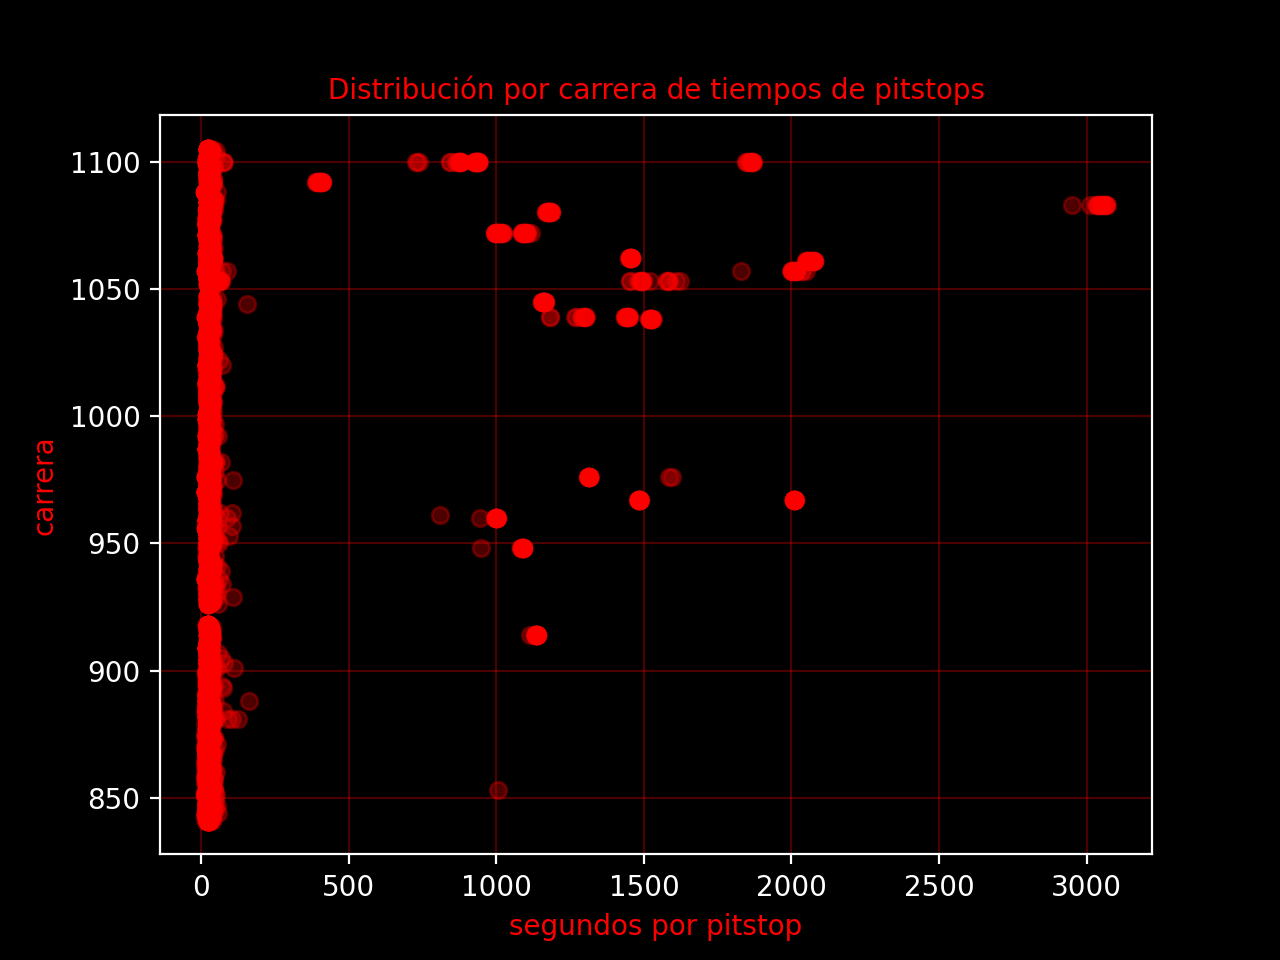

In [ ]:
plt.grid(c='red', alpha=0.3)

plt.xlabel('segundos por pitstop', c='red', fontsize=10)
plt.ylabel('carrera',fontsize=10,c='red')
plt.colorbar
plt.title('Distribución por carrera de tiempos de pitstops', c='red', fontsize=10)
plt.scatter(pit_stops['milliseconds']/1000, pit_stops["raceId"], c='red', alpha=0.3)

In [ ]:
# PERCENTILES

Q1 = np.percentile(pit_stops['milliseconds'], 25,
                   method = 'midpoint')

Q2=np.percentile(pit_stops['milliseconds'], 50, method='midpoint')

Q3 = np.percentile(pit_stops['milliseconds'], 75,
                   method = 'midpoint')

print(f"Q1: {Q1}")
print(f"Q2: {Q2}")
print(f"Q3: {Q3}")
print(f"Q3-Q1: {Q3-Q1}\n")

print('Usando función Rango ss.iqr\nIQR: {}'.format(ss.iqr(pit_stops['milliseconds'])))

Q1: 21916.0
Q2: 23575.0
Q3: 26228.5
Q3-Q1: 4312.5

Usando función Rango ss.iqr
IQR: 4312.25


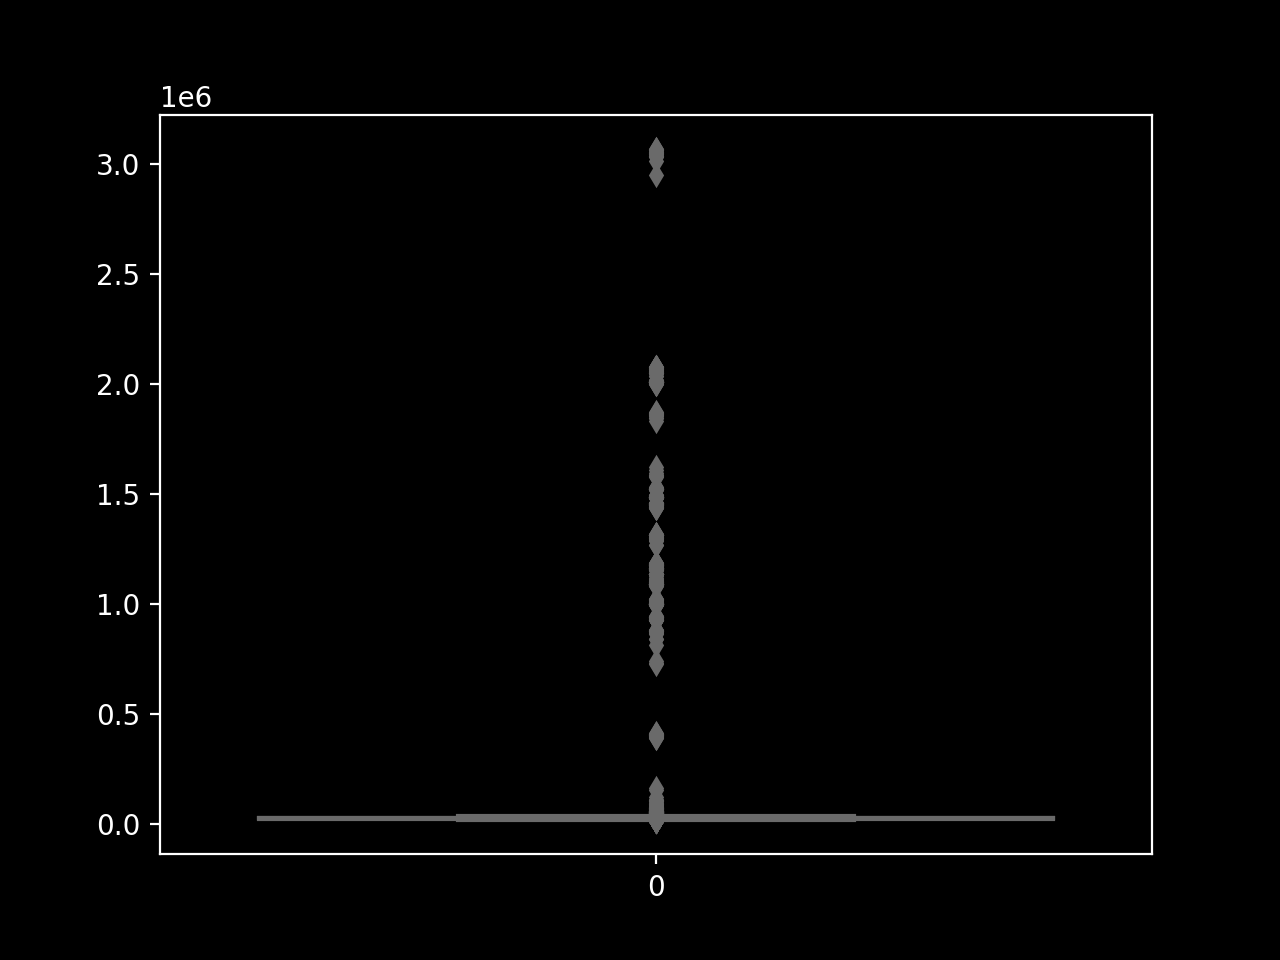

In [ ]:
sns.boxplot(pit_stops['milliseconds']);

In [ ]:
p=pit_stops['milliseconds'][pit_stops.milliseconds<15]

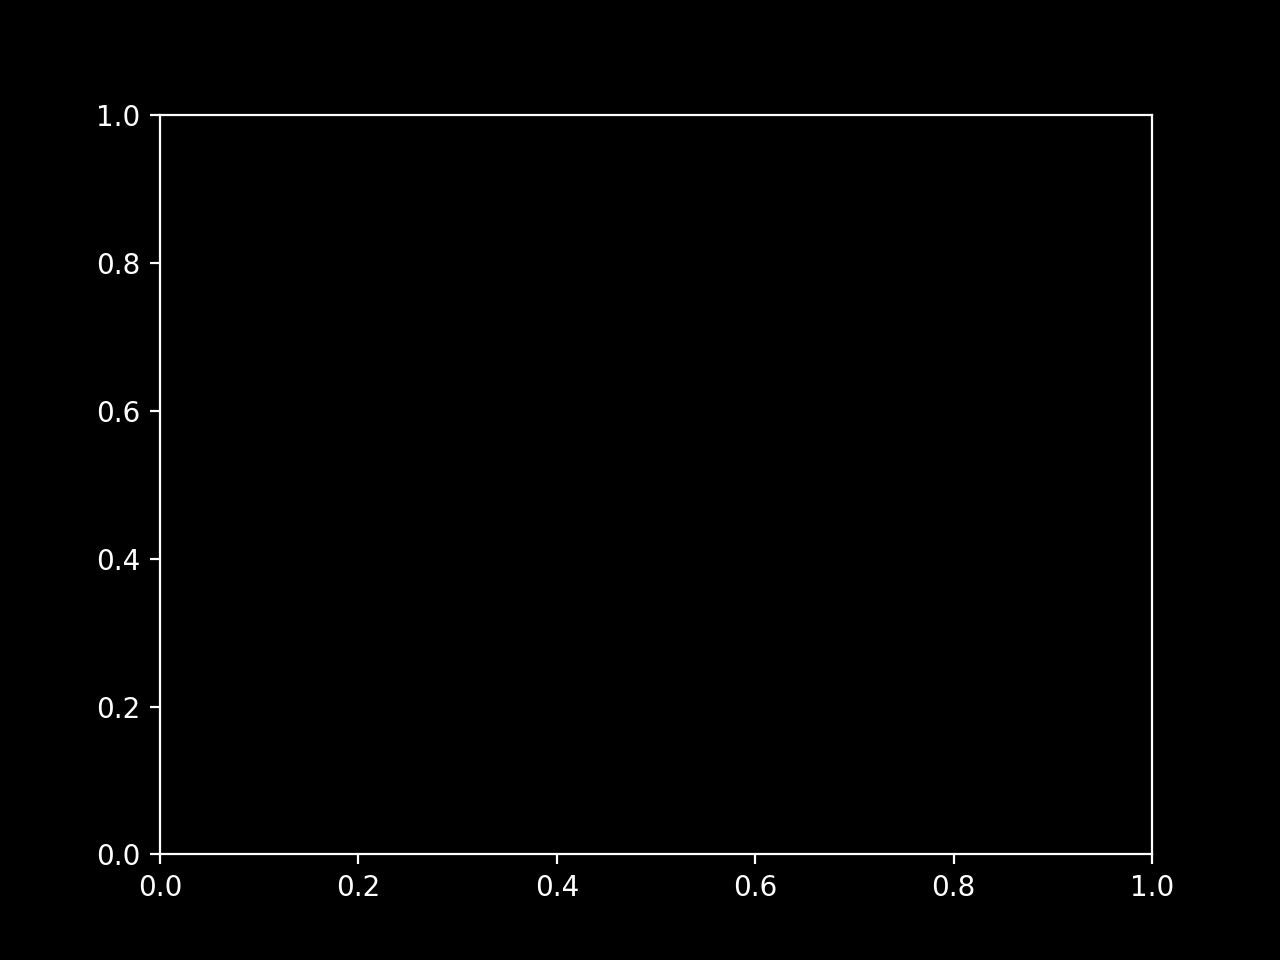

In [ ]:
sns.histplot(p, color='red', alpha=0.8);

In [ ]:
a=[1,2,3]
y=list(map(lambda x: np.sin(x), a))

In [ ]:
plt.rc_context({'axes.edgecolor':'red', 'xtick.color':'red', 'ytick.color':'red', 'figure.facecolor':'red'})
plt.barh(x,y)

NameError: name 'x' is not defined